In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 2. Load datasets
providers = pd.read_csv("C:/Users/sonal/Downloads/food-wastage-management-sqlite/food-wastage-management-sqlite/providers_clean.csv")
receivers = pd.read_csv("C:/Users/sonal/Downloads/food-wastage-management-sqlite/food-wastage-management-sqlite/receivers_clean.csv")
food_listings = pd.read_csv("C:/Users/sonal/Downloads/food-wastage-management-sqlite/food-wastage-management-sqlite/food_listings_clean.csv")
claims = pd.read_csv("C:/Users/sonal/Downloads/food-wastage-management-sqlite/food-wastage-management-sqlite/claims_clean.csv")
print("✅ Data Loaded Successfully") 

✅ Data Loaded Successfully


In [ ]:
#Provider data
print("\n--- Providers Head ---")
print(providers.head())


--- Providers Head ---
   Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   
3            4   Clark, Prince and Williams  Grocery Store   
4            5               Coleman-Farley  Grocery Store   

                                             Address            City  \
0  74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1           91228 Hanson Stream\nWelchtown, OR 27136     East Sheena   
2  561 Martinez Point Suite 507\nGuzmanchester, W...  Lake Jesusview   
3     467 Bell Trail Suite 409\nPort Jesus, IA 61188     Mendezmouth   
4  078 Matthew Creek Apt. 319\nSaraborough, MA 53978   Valentineside   

                Contact  
0       +1-600-220-0480  
1  +1-925-283-8901x6297  
2      001-517-295-2206  
3      556.944.8935x401  
4          193.714.6577  


In [10]:

#Claim data
print("\n--- Claims Head ---")
print(claims.head())


--- Claims Head ---
   Claim_ID  Food_ID  Receiver_ID     Status        Timestamp
0         1      164          908    Pending    3/5/2025 5:26
1         2      353          391  Cancelled  3/11/2025 10:24
2         3      626          492  Completed   3/21/2025 0:59
3         4       61          933  Cancelled    3/4/2025 9:08
4         5      345          229    Pending  3/14/2025 15:17


In [11]:
#receiver data
print("\n--- Receivers Head ---")
print(receivers.head())


--- Receivers Head ---
   Receiver_ID          Name        Type               City           Contact
0            1  Donald Gomez     Shelter     Port Carlburgh     (955)922-5295
1            2  Laurie Ramos  Individual         Lewisburgh      761.042.1570
2            3  Ashley Mckee         NGO  South Randalltown  691-023-0094x856
3            4    Erika Rose         NGO   South Shaneville        8296491111
4            5   John Romero  Individual          Bakerport      067.491.0154


In [12]:
#food_listing data
print("\n--- Food Listings Head ---")
print(food_listings.head())


--- Food Listings Head ---
   Food_ID Food_Name  Quantity Expiry_Date  Provider_ID     Provider_Type  \
0        1     Bread        43   3/17/2025          110     Grocery Store   
1        2      Soup        22   3/24/2025          791     Grocery Store   
2        3    Fruits        46   3/28/2025          478  Catering Service   
3        4    Fruits        15   3/16/2025          930        Restaurant   
4        5      Soup        14   3/19/2025          279        Restaurant   

           Location       Food_Type  Meal_Type  
0  South Kellyville  Non-Vegetarian  Breakfast  
1        West James  Non-Vegetarian     Dinner  
2       Lake Regina           Vegan  Breakfast  
3         Kellytown           Vegan      Lunch  
4        Garciaport           Vegan     Dinner  


In [8]:
# 4. Missing values check
print("\n--- Missing Values ---")
print("Providers:\n", providers.isnull().sum())
print("Receivers:\n", receivers.isnull().sum())
print("Food Listings:\n", food_listings.isnull().sum())
print("Claims:\n", claims.isnull().sum())


--- Missing Values ---
Providers:
 Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64
Receivers:
 Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64
Food Listings:
 Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64
Claims:
 Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64


In [13]:
# 5. Fill or drop missing values (basic cleaning)
providers.fillna("", inplace=True)
receivers.fillna("", inplace=True)
food_listings['Quantity'] = pd.to_numeric(food_listings['Quantity'], errors='coerce').fillna(0).astype(int)
claims.fillna("", inplace=True)

In [14]:
# 6. Descriptive statistics
print("\n--- Descriptive Statistics (Food Listings Quantity) ---")
print(food_listings['Quantity'].describe())


--- Descriptive Statistics (Food Listings Quantity) ---
count    1000.000000
mean       25.794000
std        14.609894
min         1.000000
25%        13.000000
50%        26.000000
75%        39.000000
max        50.000000
Name: Quantity, dtype: float64


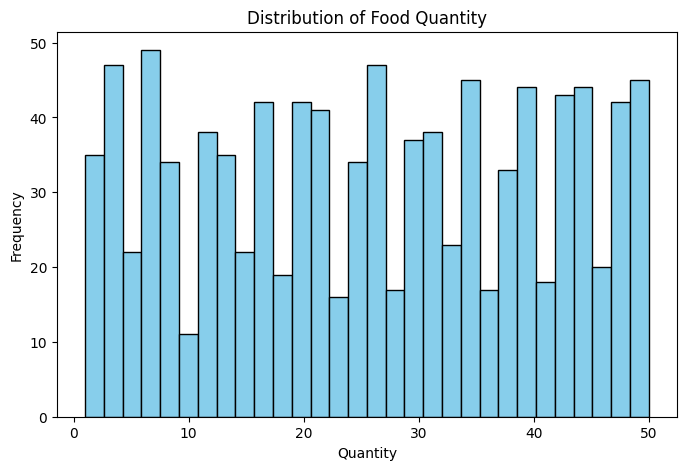

In [16]:
# 7. Visualization

## (a) Quantity Distribution
plt.figure(figsize=(8,5))
plt.hist(food_listings['Quantity'], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Food Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

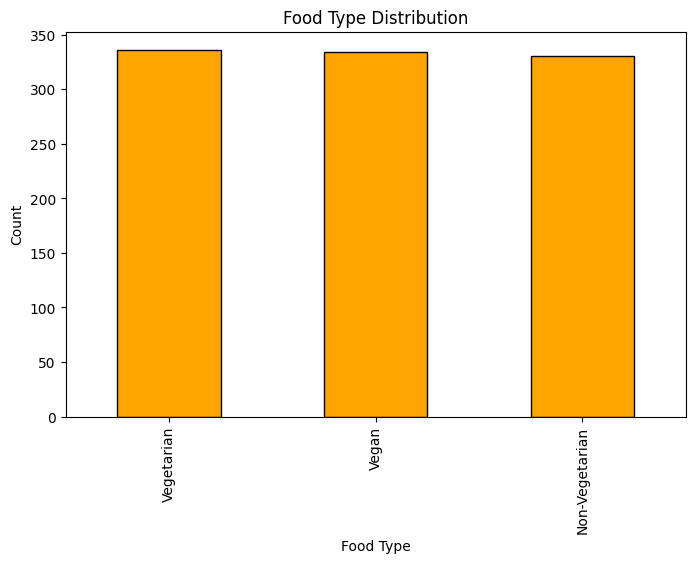

In [18]:
## (b) Food Type counts
plt.figure(figsize=(8,5))
food_listings['Food_Type'].value_counts().plot(kind='bar', color="orange", edgecolor="black")
plt.title("Food Type Distribution")
plt.xlabel("Food Type")
plt.ylabel("Count")
plt.show()

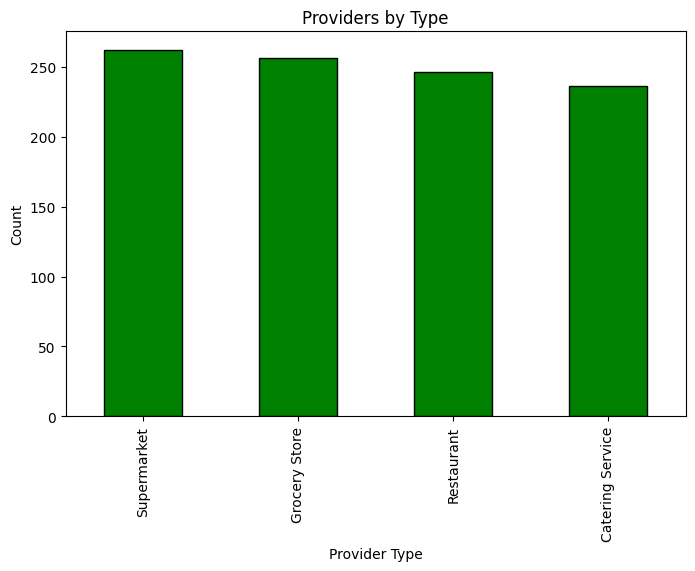

In [20]:

## (c) Providers by Type
plt.figure(figsize=(8,5))
providers['Type'].value_counts().plot(kind='bar', color="green", edgecolor="black")
plt.title("Providers by Type")
plt.xlabel("Provider Type")
plt.ylabel("Count")
plt.show()

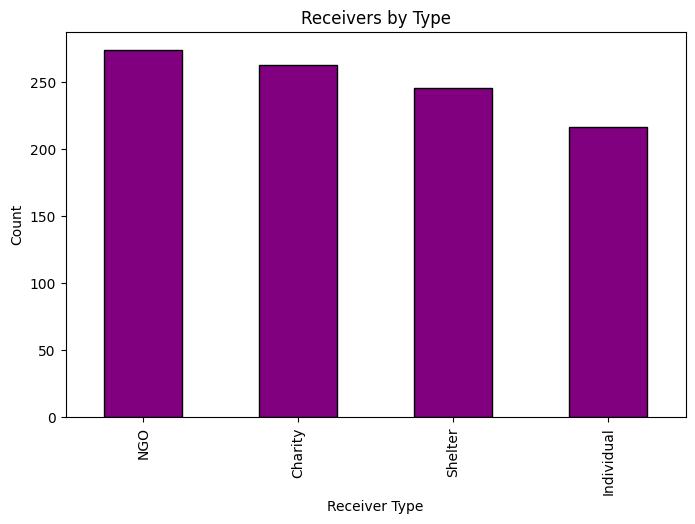

In [21]:
## (d) Receivers by Type
plt.figure(figsize=(8,5))
receivers['Type'].value_counts().plot(kind='bar', color="purple", edgecolor="black")
plt.title("Receivers by Type")
plt.xlabel("Receiver Type")
plt.ylabel("Count")
plt.show()

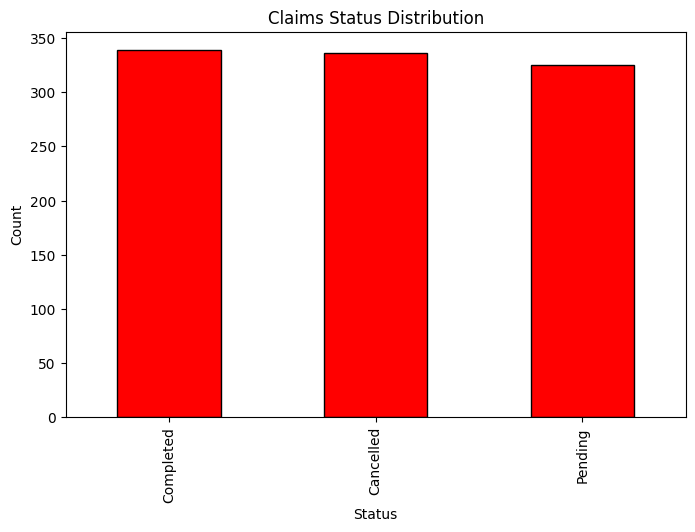

In [23]:
## (e) Claims Status
if 'Status' in claims.columns:
    plt.figure(figsize=(8,5))
    claims['Status'].value_counts().plot(kind='bar', color="red", edgecolor="black")
    plt.title("Claims Status Distribution")
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.show()

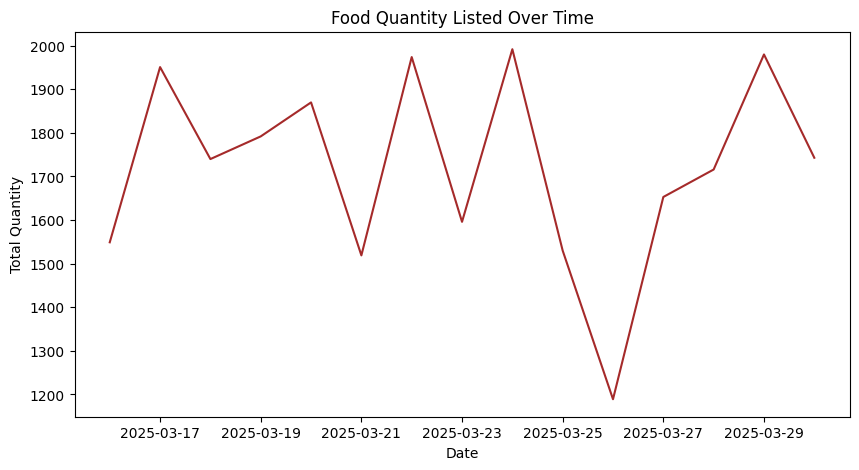

In [24]:
# 8. Time-based Analysis (if listed_at exists)
if 'Expiry_Date' in food_listings.columns:
    food_listings['Expiry_Date'] = pd.to_datetime(food_listings['Expiry_Date'], errors='coerce')
    food_listings['Expiry_Date'] = food_listings['Expiry_Date'].dt.date

    plt.figure(figsize=(10,5))
    food_listings.groupby('Expiry_Date')['Quantity'].sum().plot(color="brown")
    plt.title("Food Quantity Listed Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Quantity")
    plt.show()